# Baseball Case Study

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


-- Input features- 

1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.


-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
BCS = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
print("Successfully Imported Data!")
BCS.head(15)

Successfully Imported Data!


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
BCS.shape

(30, 17)

In [5]:
print("There are {:,} rows ".format(BCS.shape[0]) + "and {} columns in our data".format(BCS.shape[1]))

There are 30 rows and 17 columns in our data


In [6]:
BCS.set_index('W', inplace=True)

In [7]:
BCS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 95 to 68
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       30 non-null     int64  
 1   AB      30 non-null     int64  
 2   H       30 non-null     int64  
 3   2B      30 non-null     int64  
 4   3B      30 non-null     int64  
 5   HR      30 non-null     int64  
 6   BB      30 non-null     int64  
 7   SO      30 non-null     int64  
 8   SB      30 non-null     int64  
 9   RA      30 non-null     int64  
 10  ER      30 non-null     int64  
 11  ERA     30 non-null     float64
 12  CG      30 non-null     int64  
 13  SHO     30 non-null     int64  
 14  SV      30 non-null     int64  
 15  E       30 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 4.0 KB


In [8]:
BCS.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
NULLS = BCS[BCS.isnull().any(axis=1)]

In [10]:
BCS.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
BCS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 95 to 68
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       30 non-null     int64  
 1   AB      30 non-null     int64  
 2   H       30 non-null     int64  
 3   2B      30 non-null     int64  
 4   3B      30 non-null     int64  
 5   HR      30 non-null     int64  
 6   BB      30 non-null     int64  
 7   SO      30 non-null     int64  
 8   SB      30 non-null     int64  
 9   RA      30 non-null     int64  
 10  ER      30 non-null     int64  
 11  ERA     30 non-null     float64
 12  CG      30 non-null     int64  
 13  SHO     30 non-null     int64  
 14  SV      30 non-null     int64  
 15  E       30 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 4.0 KB


<Axes: ylabel='W'>

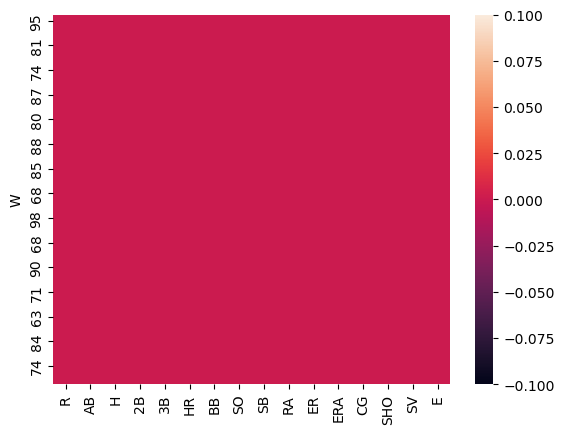

In [12]:
sns.heatmap(BCS.isnull())

In [13]:
BCS.duplicated().sum()

0

In [14]:
BCS.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [15]:
BCS.sort_values(by="SHO", ascending=True).head(15)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,,,,,,,,,,,,,,,,
68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95
87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [16]:
BCS.sort_values(by="SHO", ascending=False).head(15)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,,,,,,,,,,,,,,,,
92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96
68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


In [17]:
BCS_W = BCS.groupby('W')
BCS_W['SHO'].describe().sort_values(by="mean",ascending=True).head(15)

,count,mean,std,min,25%,50%,75%,max
W,,,,,,,,
87,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
63,1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0
64,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0
95,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0
68,3.0,8.666667,5.686241,4.0,5.50,7.0,11.00,15.0
74,2.0,9.000000,4.242641,6.0,7.50,9.0,10.50,12.0
88,1.0,9.000000,NaN,9.0,9.00,9.0,9.00,9.0
67,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
78,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0


In [19]:
BCScor=BCS.corr() # Display the correlation matrix
BCScor

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996


# Create a heatmap for the correlation matrix

<Axes: >

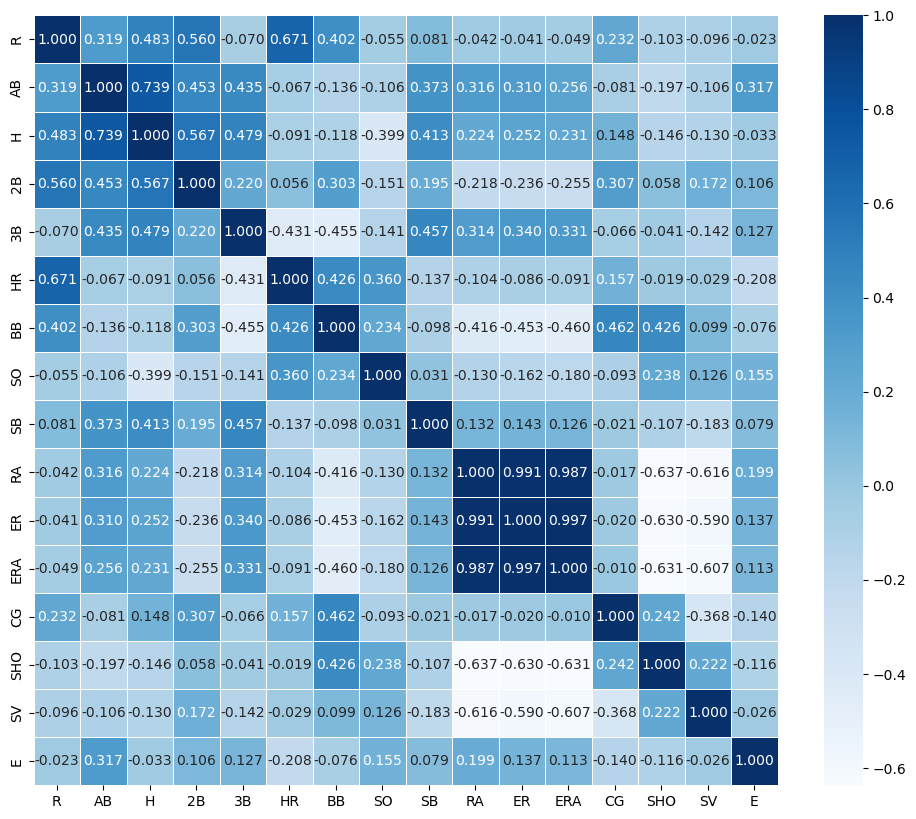

In [20]:
 plt.figure(figsize=(12,10))
sns.heatmap(BCS.corr(),cmap='Blues',linewidth=0.5, annot=True,fmt='.3f')

# EDA ---- Performing 

Ploting Outliners 

Calculates the skewness of the data rather than identifying and plotting outliers.


In [21]:
BCS.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Z-scores are a way to measure how many standard deviations a data point is away from the mean of the distribution.


1. `from scipy.stats import zscore`: This line imports the `zscore` function from the `scipy.stats` module, which is used to calculate Z-scores.

2. `import numpy as np`: This imports the `numpy` module, and it is common to use the alias `np` for convenience.

3. `z = np.abs(zscore(BCS))`: This calculates the Z-scores for each data point in the DataFrame `BCS` using the `zscore` function. The `np.abs()` function is then used to take the absolute values of the Z-scores, ensuring that all values are positive.

After running this code, the variable `z` will contain the Z-scores for each data point in `BCS`. Positive Z-scores indicate that the data point is above the mean, while negative Z-scores indicate that the data point is below the mean. Larger absolute Z-scores indicate that the data point is further away from the mean, and thus, it is considered more "extreme" or an outlier.

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(BCS))
z

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,,,,,,,,,,,,,,,,
95,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
83,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
81,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
76,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
74,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
93,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
87,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
81,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
80,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576


In [23]:
def EDA(BCS,i): 
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=BCS,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=BCS)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=BCS)
    plt.show()

In [24]:
if 'W' in BCS.columns:
    EDA(BCS, 'R')
else:
    print("The 'W' column is not present in the DataFrame.")


The 'W' column is not present in the DataFrame.


# Calling the `EDA` function with `BCS` as the DataFrame and 'R' as the column name to analyze. This will display two plots side by side:

1. Histogram: It displays the distribution of the 'R' column using a histogram with a KDE (Kernel Density Estimation) curve.

2. Box plot: It presents the box plot for the 'R' column, providing information about the median, quartiles, and potential outliers.

This function allows you to quickly visualize the distribution and potential outliers in the all column of the DataFrame `BCS`.

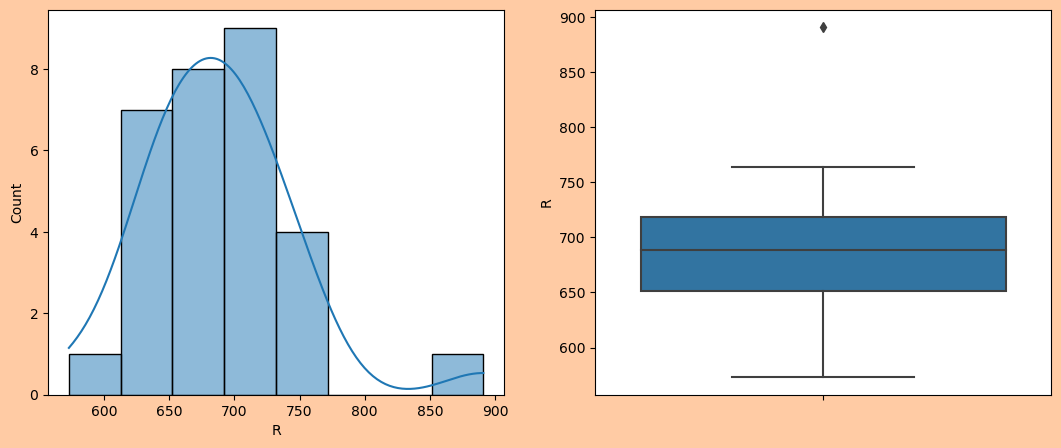

In [25]:
def EDA(BCS, i): 
    plt.figure(figsize=(20, 5), facecolor='#FFCBA4')
    plt.subplot(1, 3, 1)
    sns.histplot(x=i, data=BCS, kde=True)
    plt.subplot(1, 3, 2)
    sns.boxplot(y=i, data=BCS)
    plt.show()

EDA(BCS, 'R')


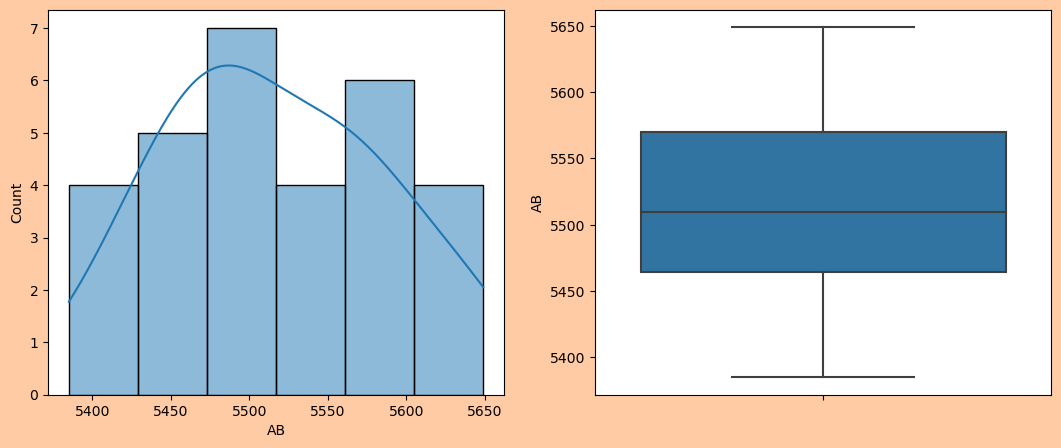

In [26]:
EDA(BCS,'AB')

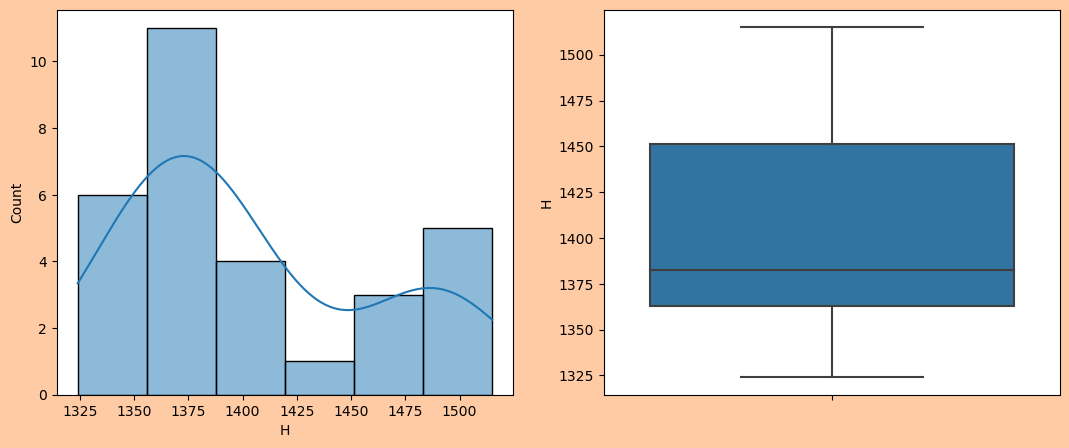

In [27]:

EDA(BCS,'H')

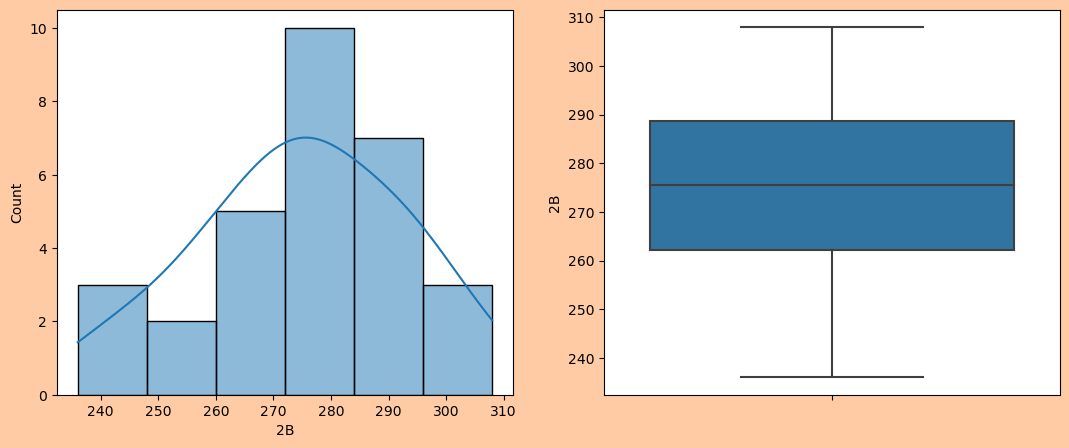

In [28]:
EDA(BCS,'2B')

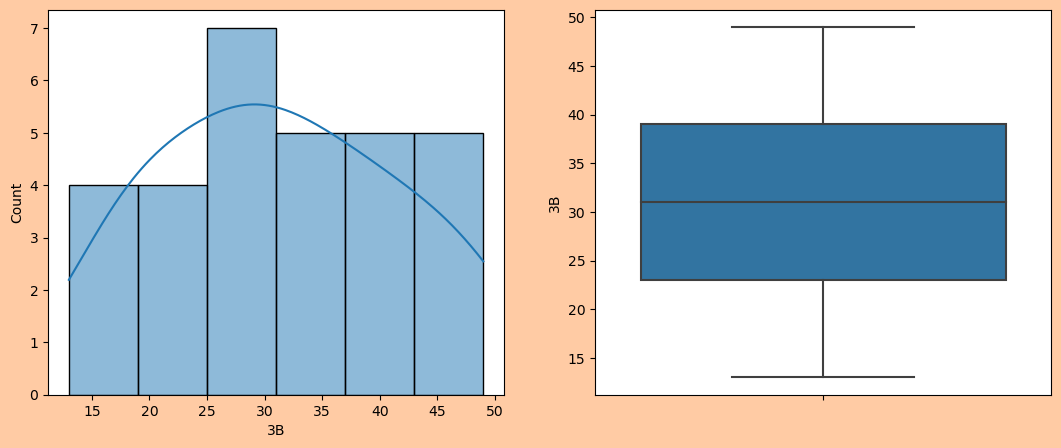

In [29]:
EDA(BCS,'3B')

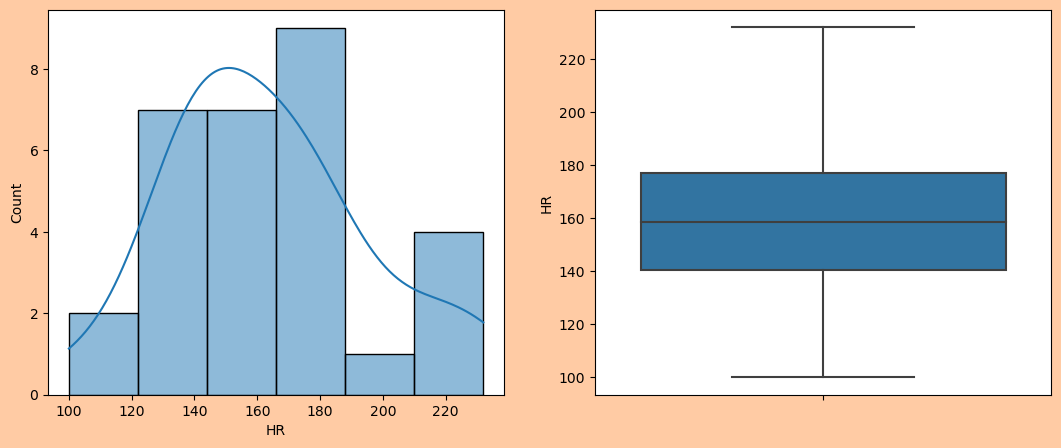

In [30]:
EDA(BCS,'HR')

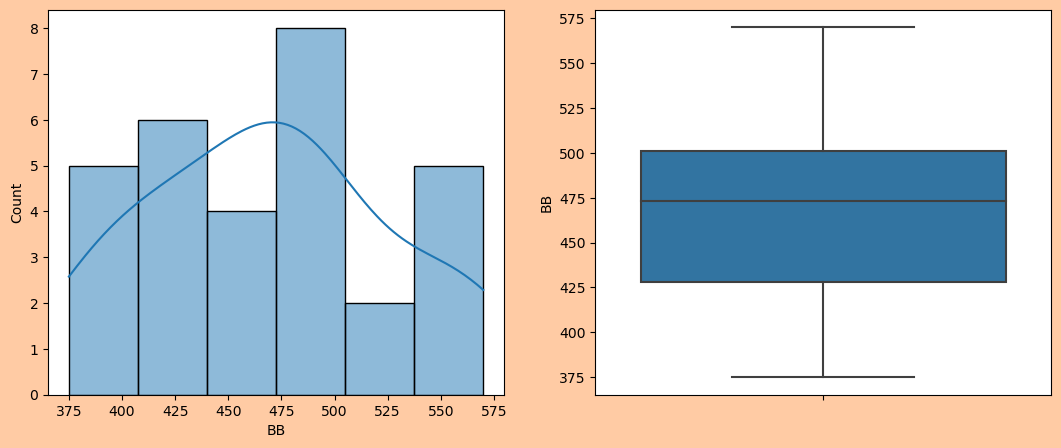

In [31]:
EDA(BCS,'BB')

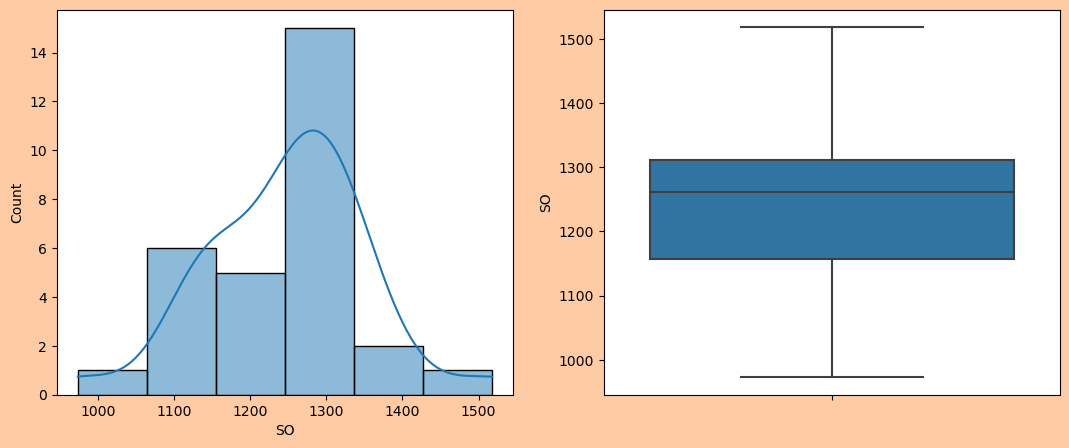

In [32]:
EDA(BCS,'SO')

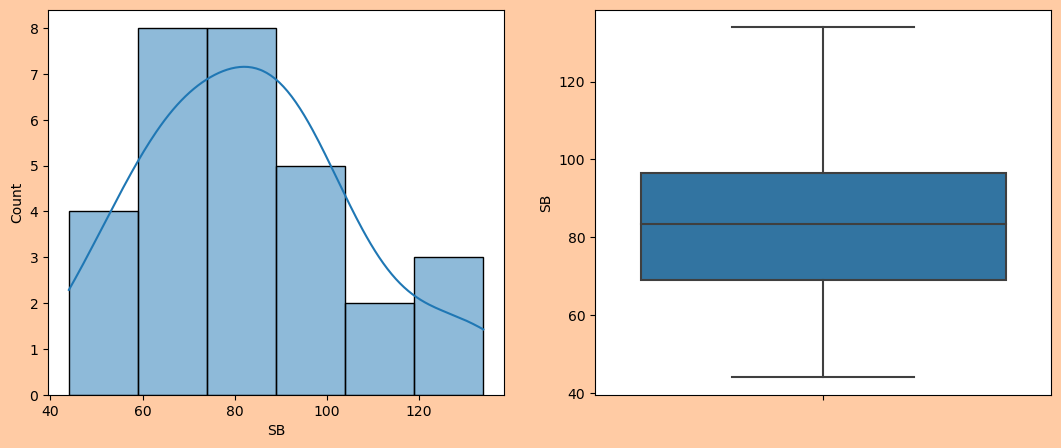

In [33]:
EDA(BCS,'SB')

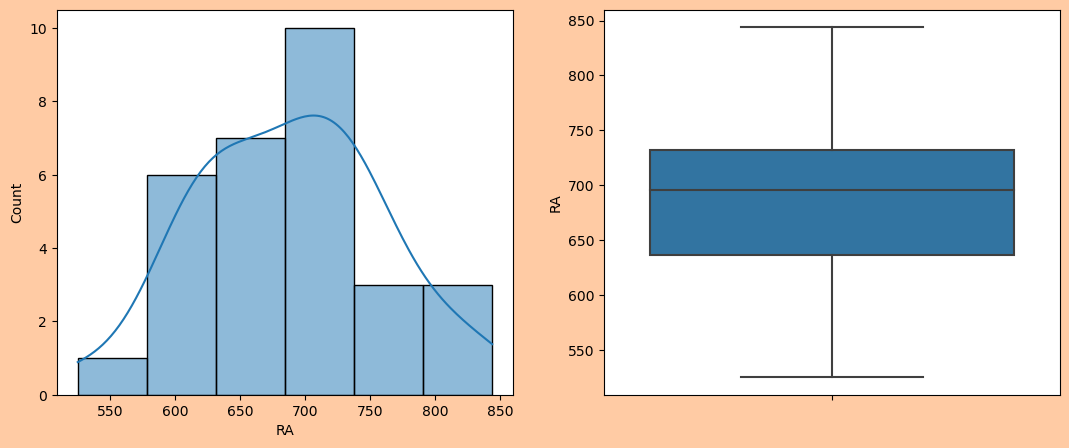

In [34]:
EDA(BCS,'RA')

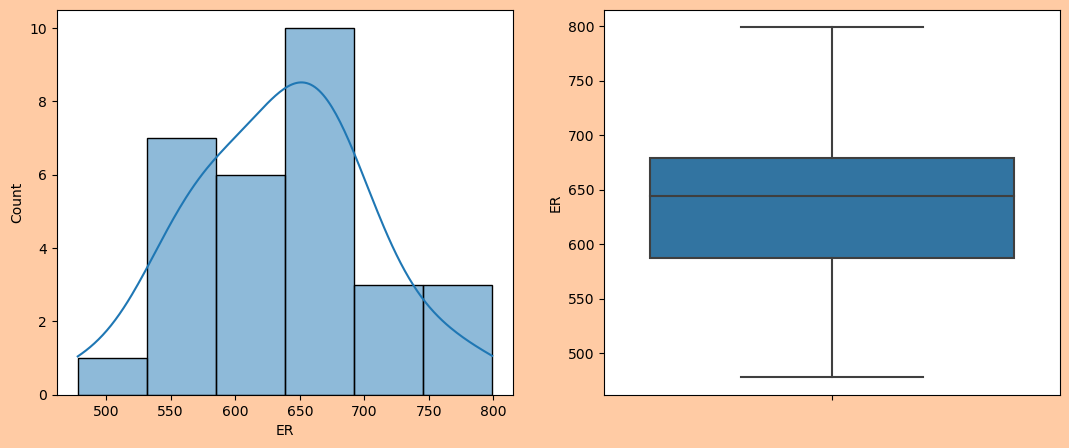

In [35]:
EDA(BCS,'ER')

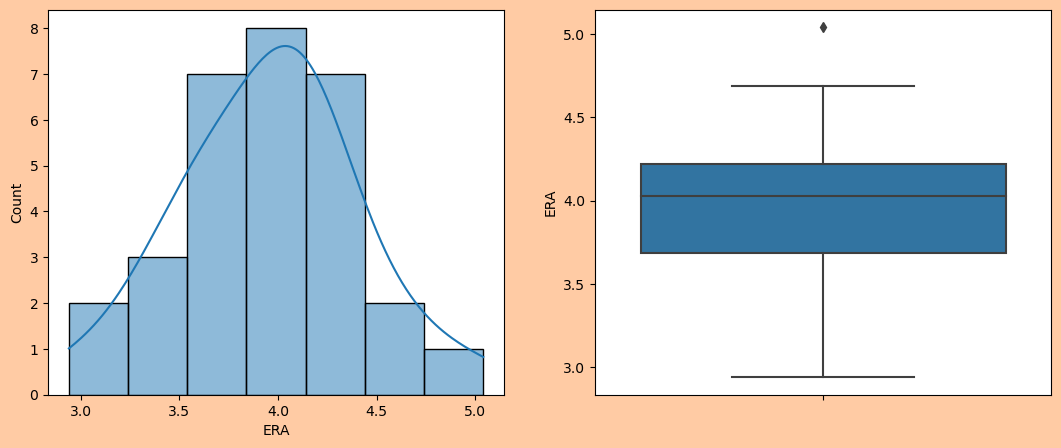

In [36]:
EDA(BCS,'ERA')

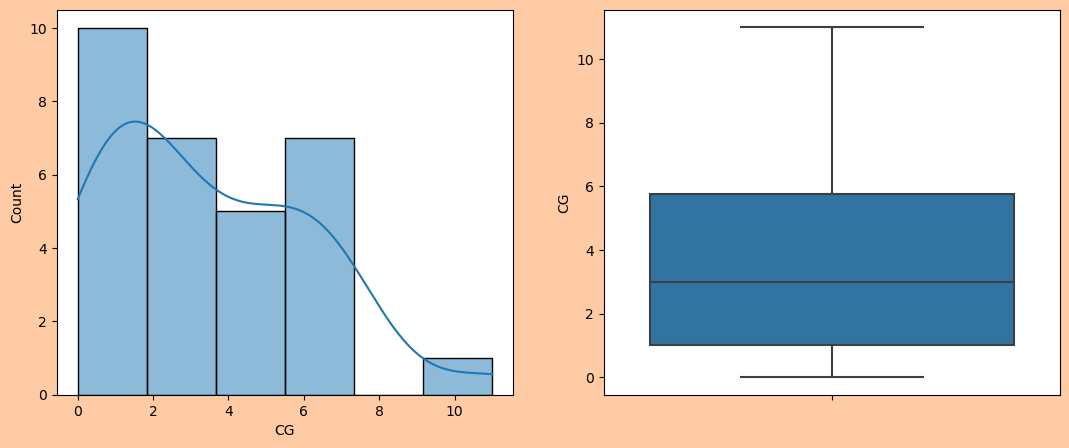

In [37]:
EDA(BCS,'CG')

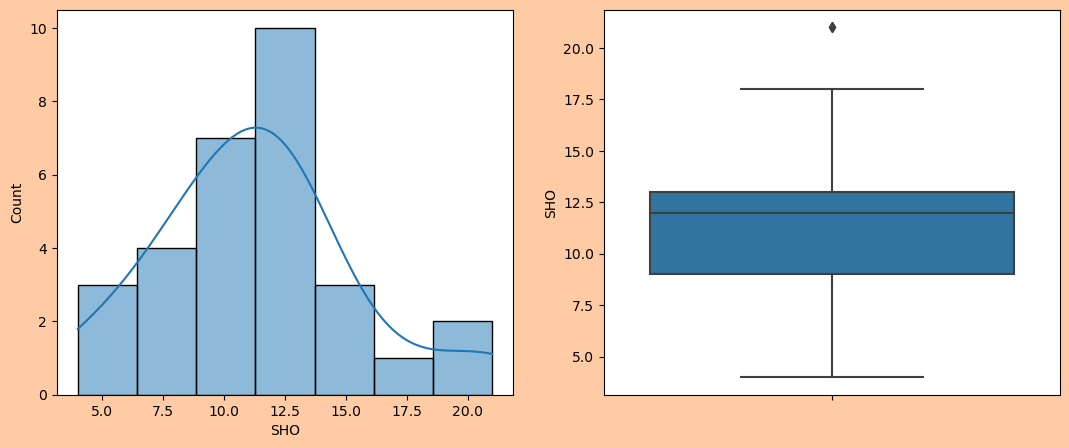

In [38]:
EDA(BCS,'SHO') 

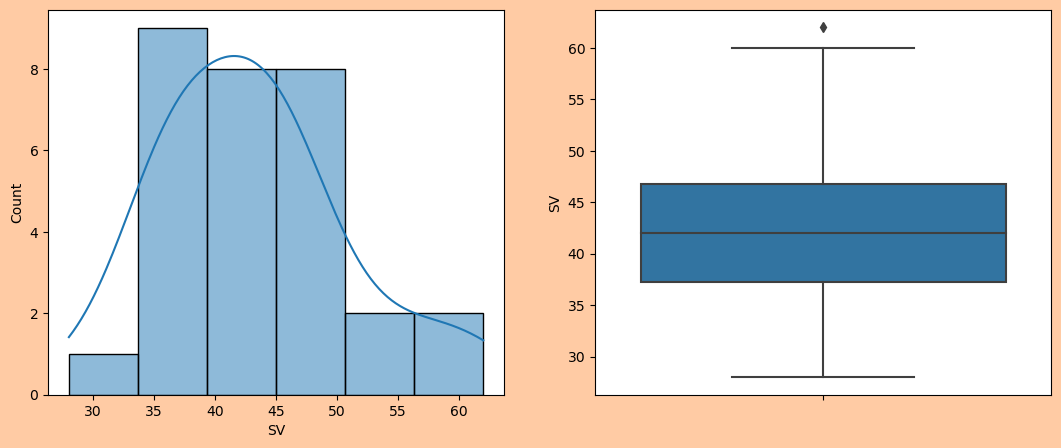

In [39]:
EDA(BCS,'SV') 

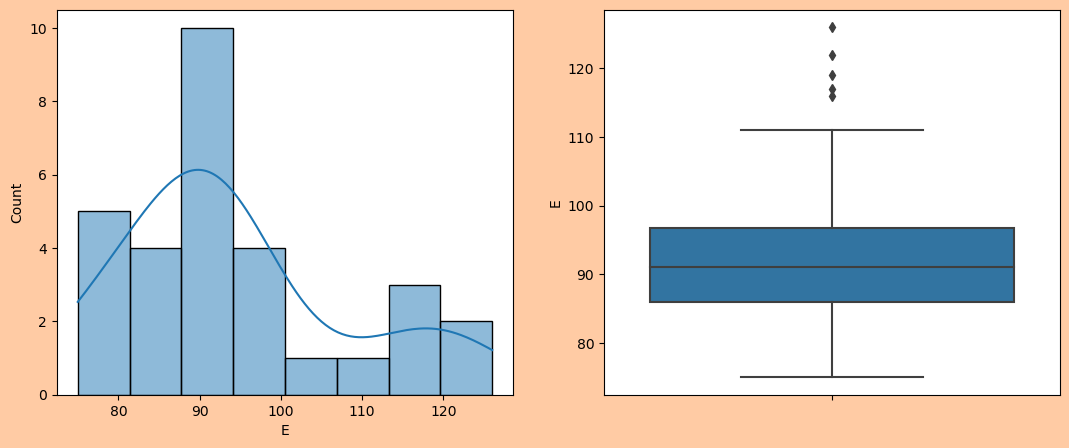

In [40]:
EDA(BCS,'E') 

# Now Univeriate Analysis

When We execute this code, you will get 25 box plots, each representing the distribution of a numerical column in the DataFrame `BCS`. This can be useful to quickly visualize the distribution, quartiles, and potential outliers for each numerical variable in the dataset.

R         Axes(0.125,0.747241;0.133621x0.132759)
AB     Axes(0.285345,0.747241;0.133621x0.132759)
H       Axes(0.44569,0.747241;0.133621x0.132759)
2B     Axes(0.606034,0.747241;0.133621x0.132759)
3B     Axes(0.766379,0.747241;0.133621x0.132759)
HR        Axes(0.125,0.587931;0.133621x0.132759)
BB     Axes(0.285345,0.587931;0.133621x0.132759)
SO      Axes(0.44569,0.587931;0.133621x0.132759)
SB     Axes(0.606034,0.587931;0.133621x0.132759)
RA     Axes(0.766379,0.587931;0.133621x0.132759)
ER        Axes(0.125,0.428621;0.133621x0.132759)
ERA    Axes(0.285345,0.428621;0.133621x0.132759)
CG      Axes(0.44569,0.428621;0.133621x0.132759)
SHO    Axes(0.606034,0.428621;0.133621x0.132759)
SV     Axes(0.766379,0.428621;0.133621x0.132759)
E          Axes(0.125,0.26931;0.133621x0.132759)
dtype: object

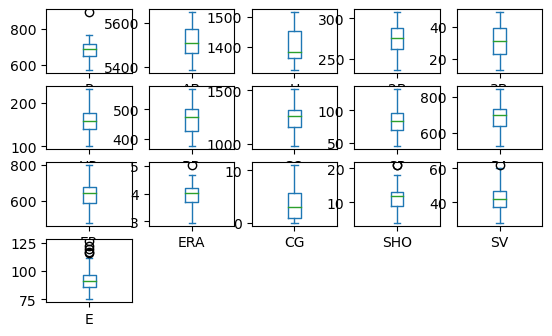

In [41]:
BCS.plot(kind='box',subplots=True,layout=(5,5))

# Than Check distribution of skewness

To check the distribution of skewness for a specific column in the DataFrame `BCS`, we can use the `sns.displot()` function from the seaborn library. 
When we execute this code, seaborn will create a histogram with a KDE (Kernel Density Estimation) curve for the any column in the DataFrame `BCS`. This will allow you to visually inspect the distribution and skewness of the data in that column.


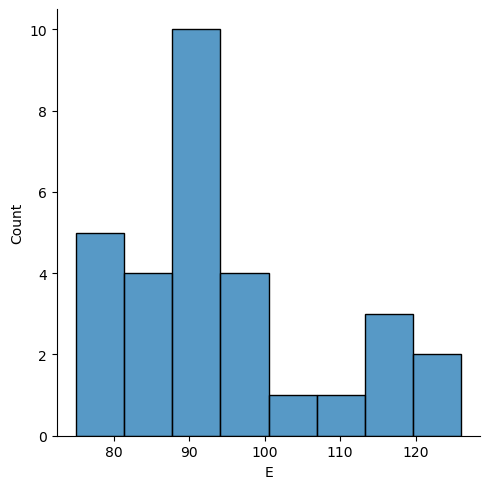

In [42]:
sns.displot(BCS['E'])

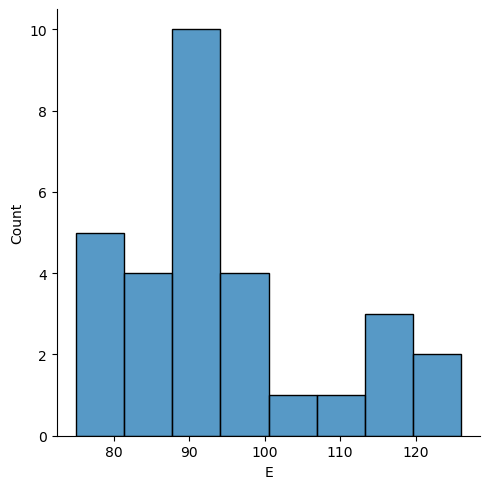

In [43]:
sns.displot(BCS['E'])

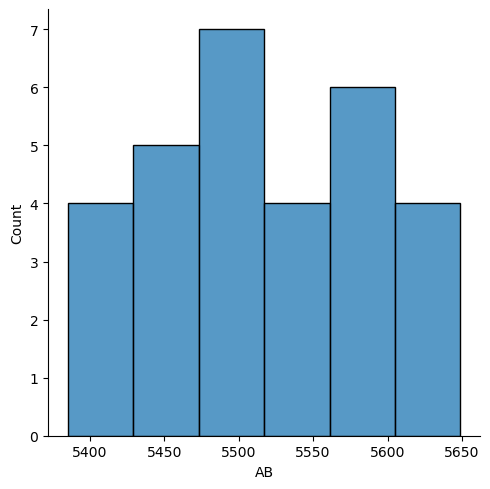

In [44]:
sns.displot(BCS['AB'])

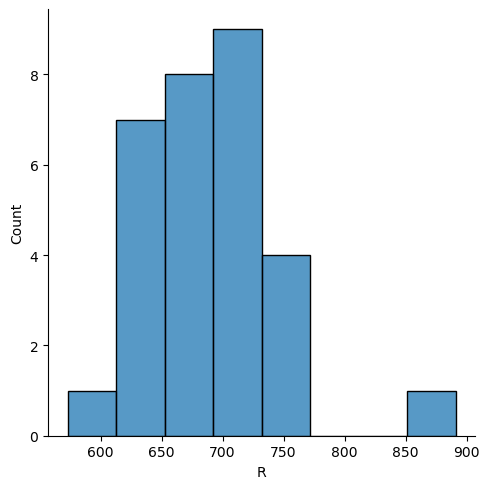

In [45]:
sns.displot(BCS['R'])

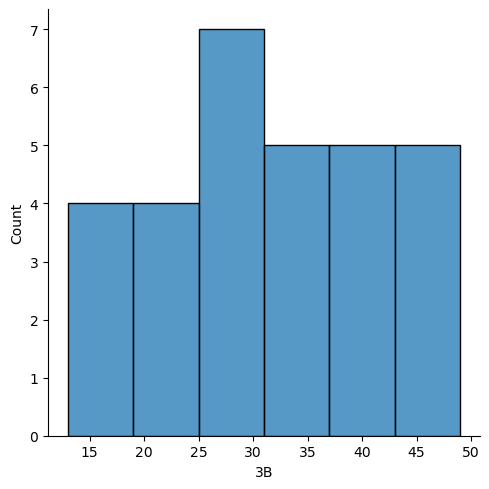

In [46]:
sns.displot(BCS['3B'])

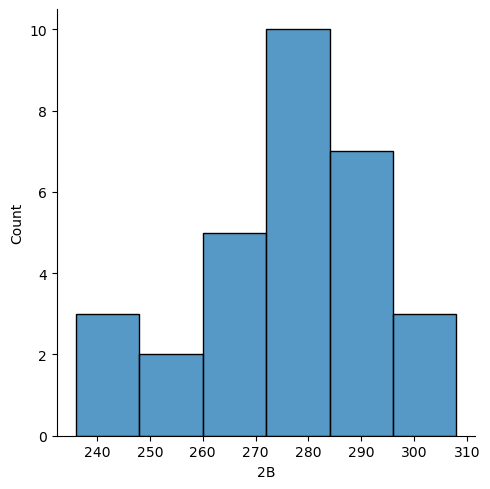

In [47]:
sns.displot(BCS['2B'])

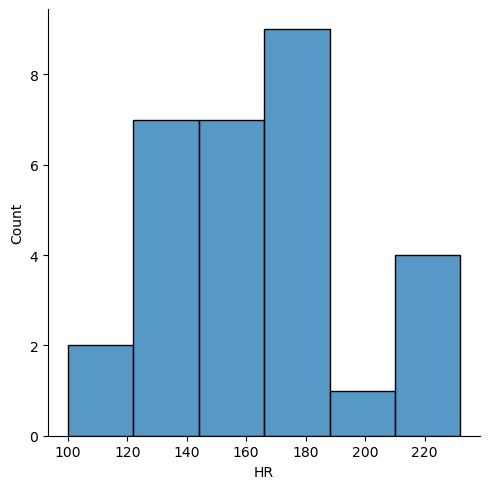

In [48]:
sns.displot(BCS['HR'])

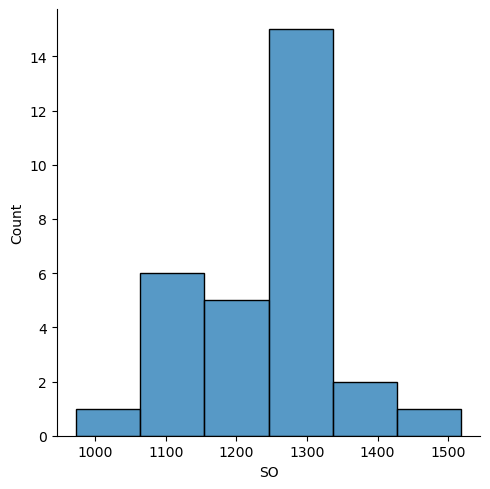

In [49]:
sns.displot(BCS['SO'])

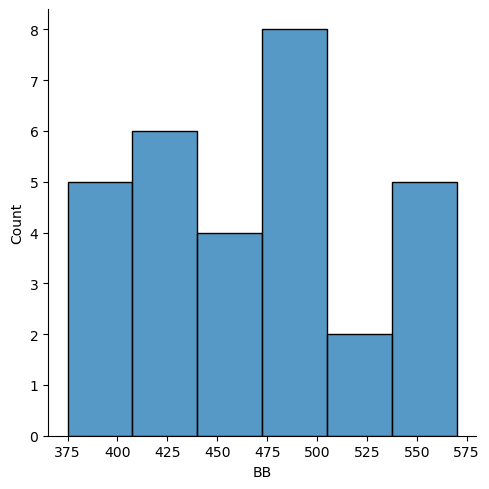

In [50]:
sns.displot(BCS['BB'])

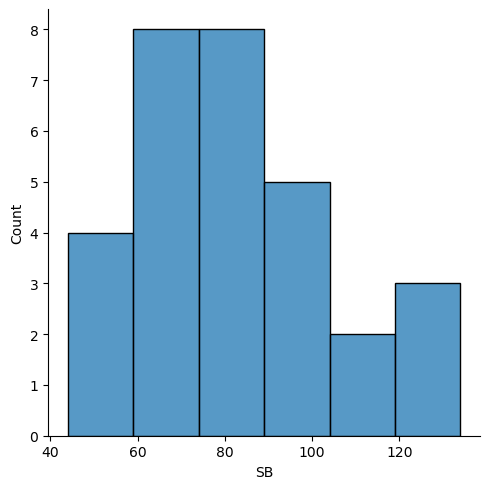

In [51]:
sns.displot(BCS['SB'])

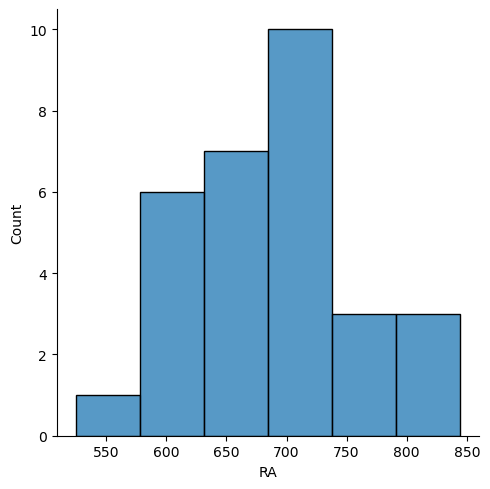

In [52]:
sns.displot(BCS['RA'])

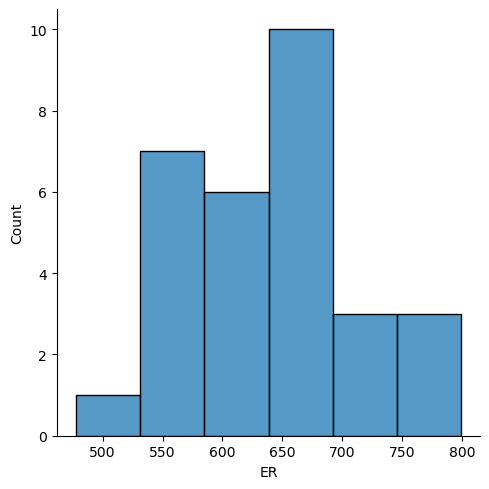

In [53]:
sns.displot(BCS['ER'])

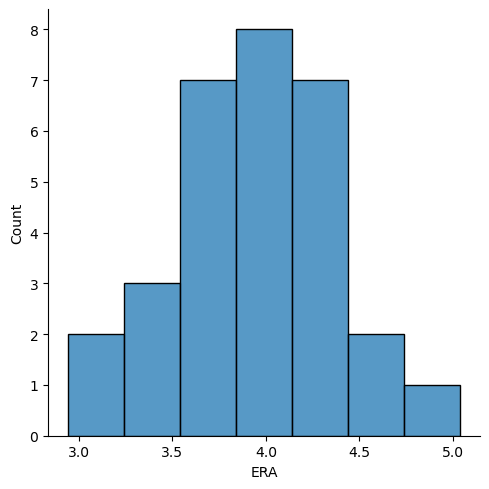

In [54]:
sns.displot(BCS['ERA'])

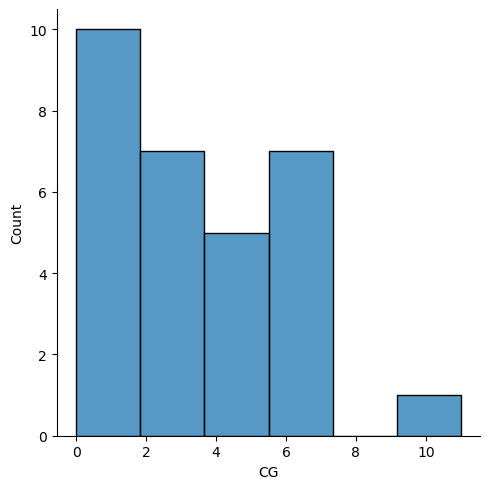

In [55]:
sns.displot(BCS['CG'])

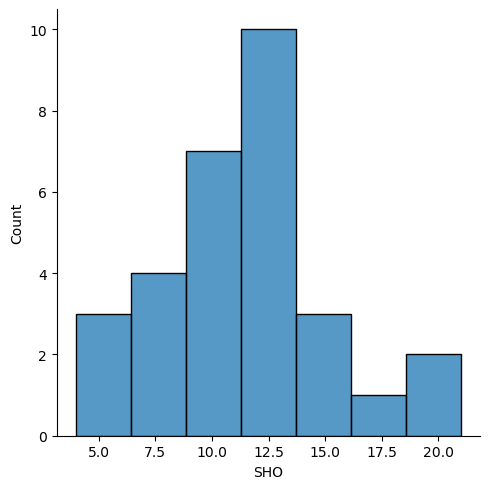

In [56]:
sns.displot(BCS['SHO'])

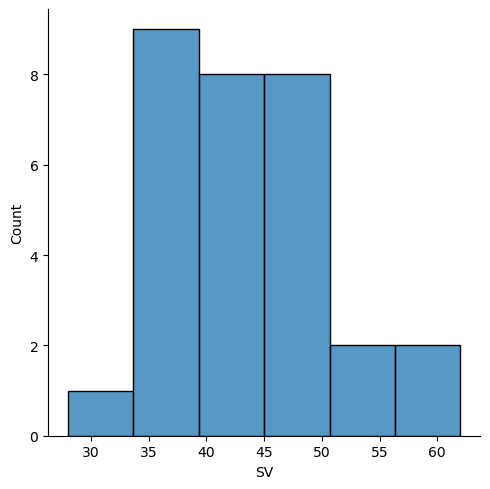

In [57]:
sns.displot(BCS['SV'])

# Uses the `plot.hist()` 
function to plot a histogram for the column 'R' in the DataFrame `BCS`. This is a quick and simple way to visualize the distribution of the data in the 'R' column.

When we execute this code, it will generate a histogram for the data in the 'R' column of the DataFrame `BCS`. The x-axis will represent the values in the 'R' column, and the y-axis will represent the frequency (count) of each value. The histogram provides a visual representation of the distribution of data in the 'R' column, showing how the values are spread across different bins or intervals.

<Axes: ylabel='Frequency'>

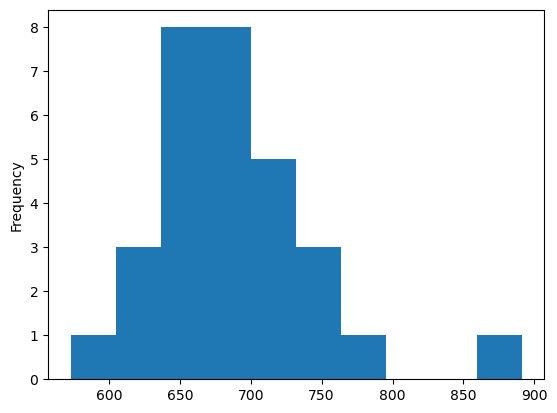

In [58]:
BCS['R'].plot.hist()

# uses the `sns.pairplot()`
function from the seaborn library to create a pair plot for the DataFrame `BCS`. A pair plot is a powerful visualization tool that allows to quickly analyze the relationships between multiple numerical variables in a dataset.

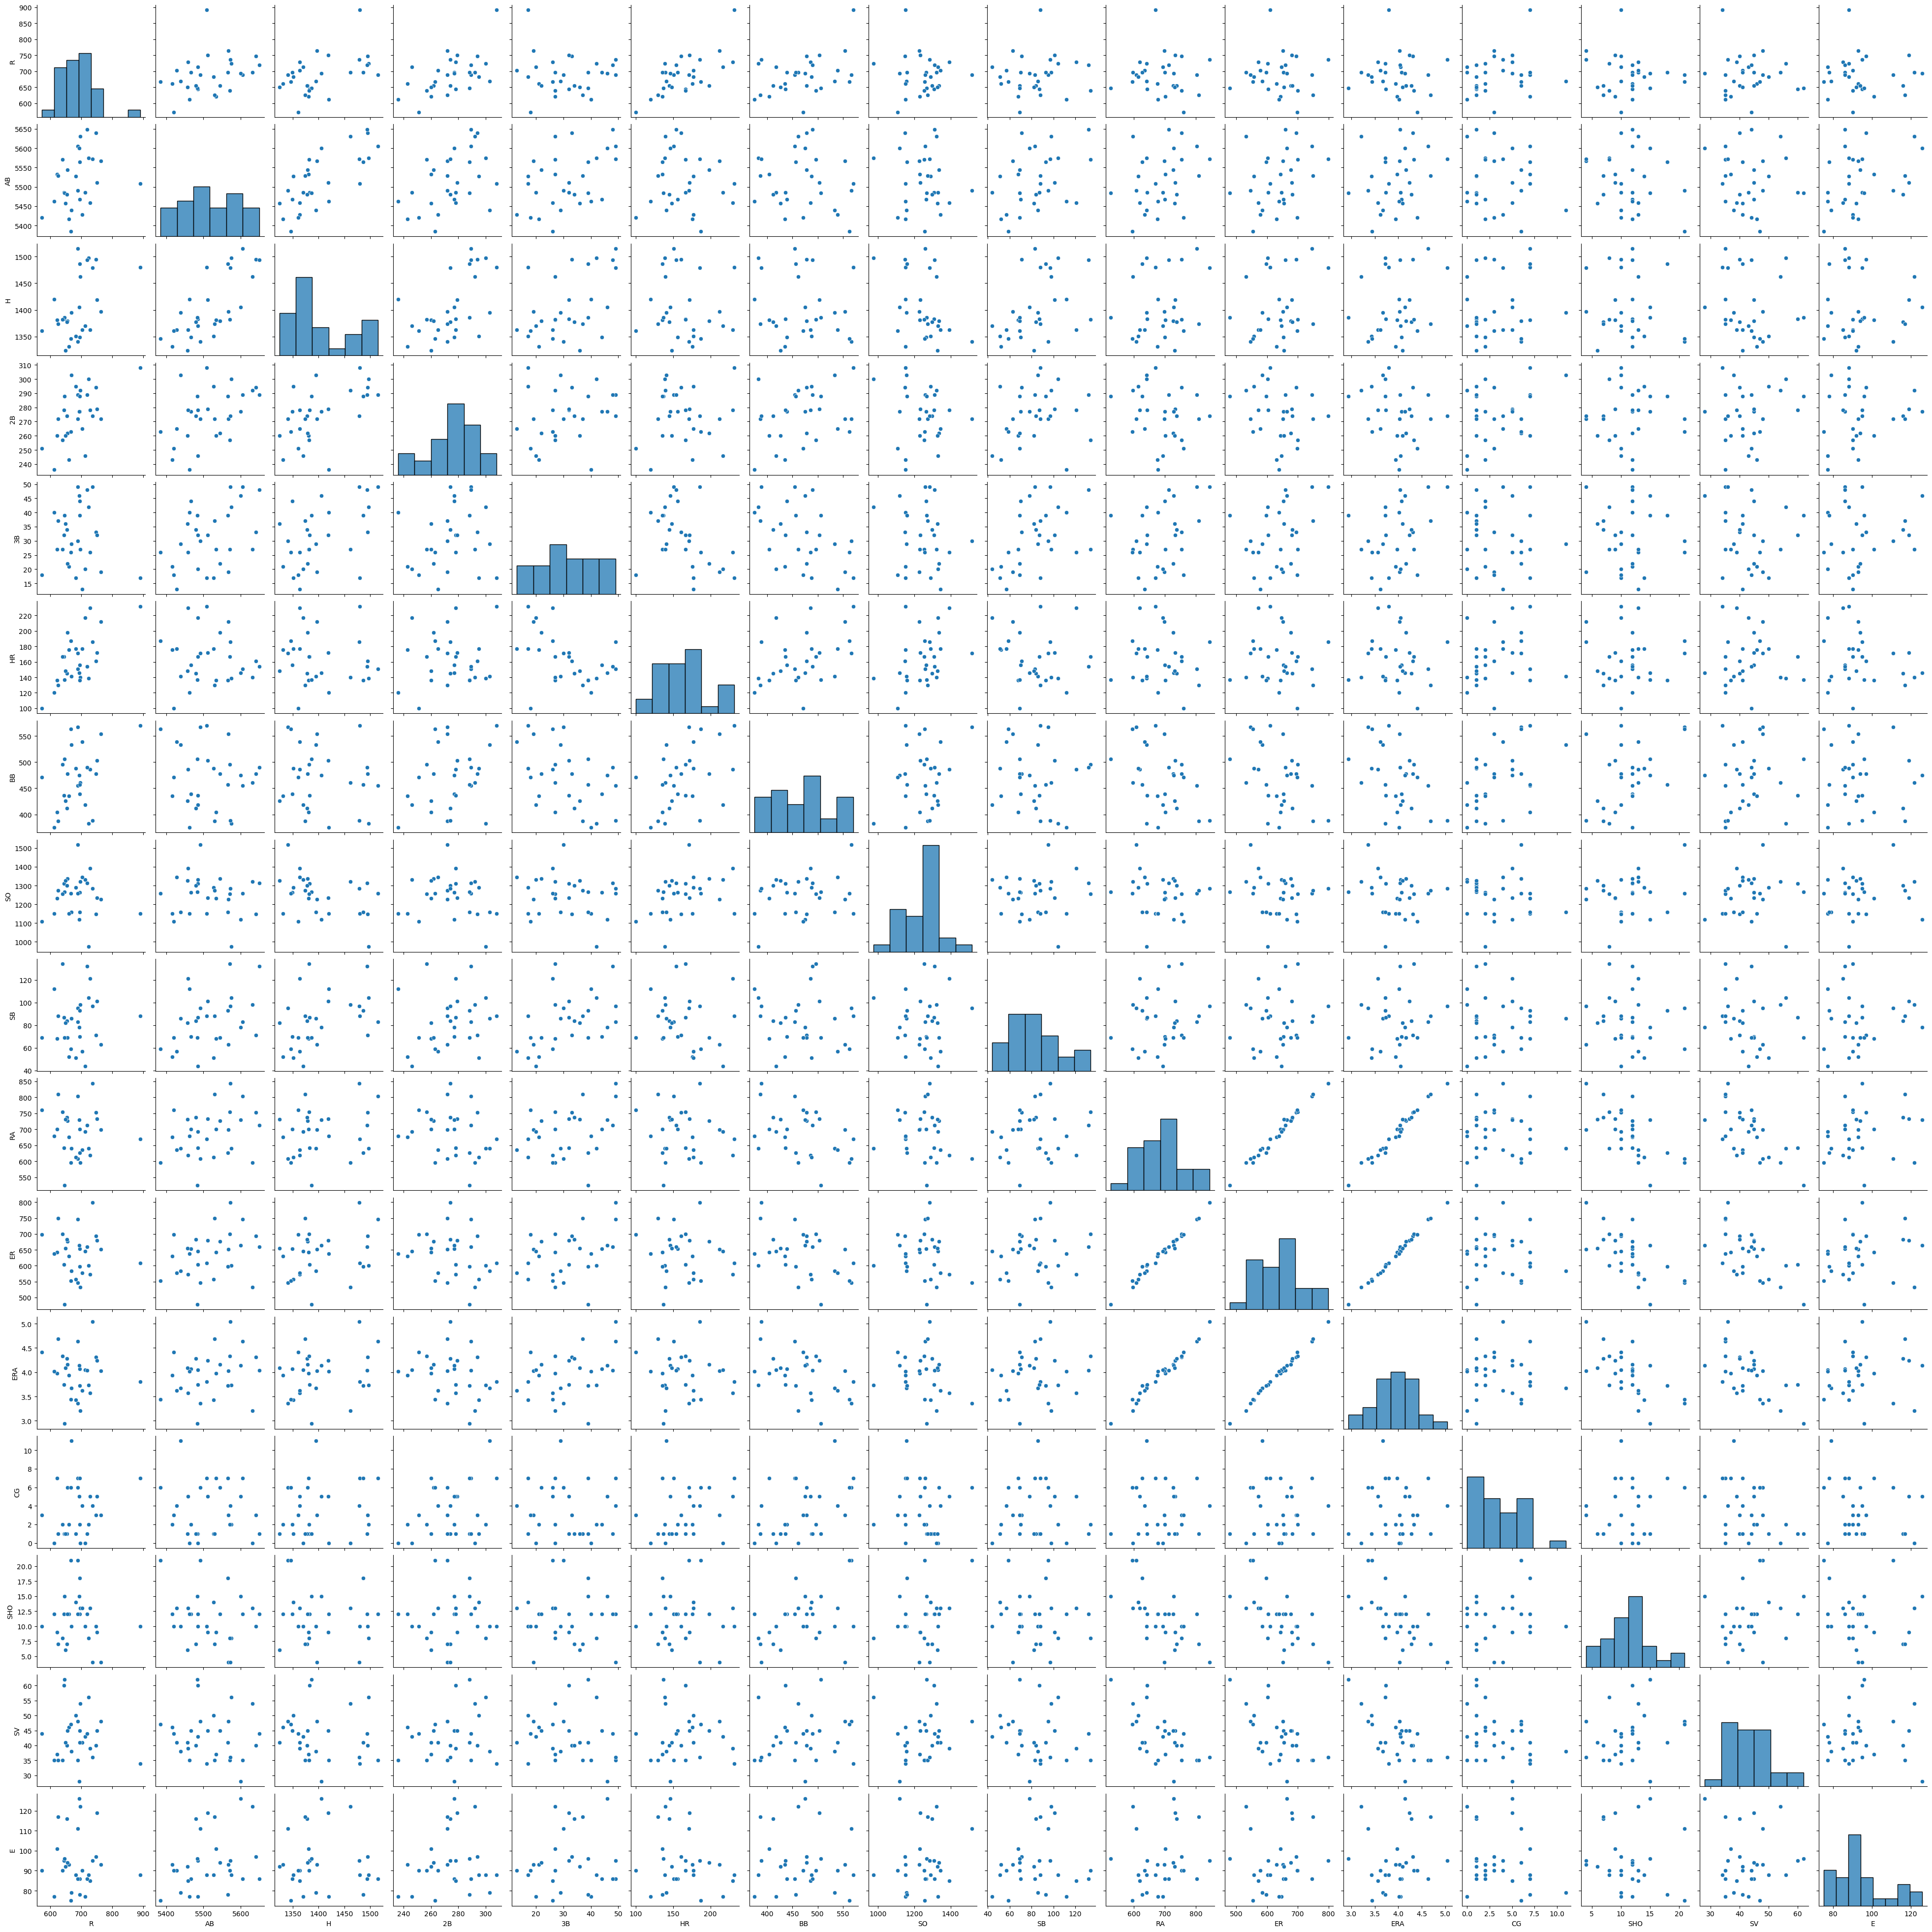

In [59]:
sns.pairplot(BCS)

# Removing outliers

Aims to remove outliers from the DataFrame `BCS` using the Z-score method. The Z-score is a statistical measure that quantifies how many standard deviations a data point is from the mean. Data points with Z-scores beyond a certain threshold (usually 3) are considered outliers.


1. Calculate the Z-scores for each data point in the DataFrame `BCS` using the `zscore()` function from the `scipy.stats` module. The absolute Z-scores are stored in the variable `z`.

2. Set the threshold for outlier detection as 3. Any data point with a Z-score greater than 3 (in either positive or negative direction) will be considered an outlier.

3. Create a new DataFrame `BCS1` by filtering out the rows where all the Z-scores are less than 3 using the condition `(z < 3).all(axis=1)`. This means that only rows without any outliers will be kept in the new DataFrame `BCS1`.

4. Calculate the percentage of data loss due to the removal of outliers and print the result. The percentage of data loss is computed as the difference between the number of rows in the original DataFrame `BCS` and the new DataFrame `BCS1`, divided by the total number of rows in `BCS`.

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(BCS))
threshold=3
BCS1=BCS[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(BCS.shape[0]-BCS1.shape[0])/BCS.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


In [61]:
BCS.shape

(30, 16)

To determine the shape of the DataFrame `BCS`, we can use the `.shape` attribute, which returns a tuple representing the number of rows and columns in the DataFrame.

In [62]:
BCS1.shape

(29, 16)

# scatter plot
The scatter plot is useful for visualizing the relationship between two variables. If the points form a recognizable pattern, it suggests a potential correlation or relationship between the two variables. A positive correlation will show a general upward trend, while a negative correlation will show a general downward trend. No clear pattern may indicate little or no relationship between the variables.

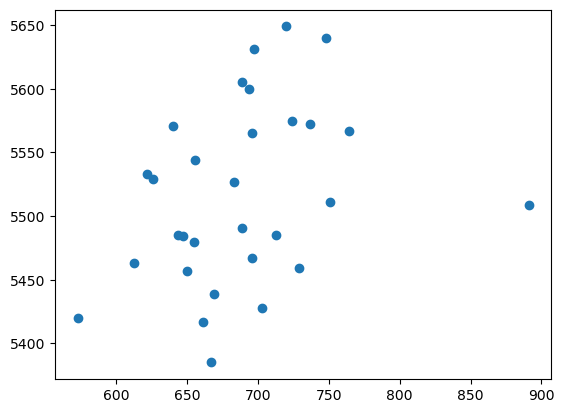

In [63]:
x=BCS['R']
y=BCS['AB']
plt.scatter(x,y)
plt.show()

# Iloc` Indexer
It selects all rows and all columns except for the last column using the `.iloc` indexer.


The `.iloc` indexer is used here to extract a subset of the DataFrame. The notation `[:, 0:-1]` selects all rows (indicated by `:`) and all columns from the first column up to the second-to-last column (indicated by `0:-1`). The last column, which is typically the target variable or the column with the dependent variable, is not included in this selection.

The `x` DataFrame will contain all the features or independent variables from `BCS1`. The `.head()` function is used to display the first few rows of the `x` DataFrame for inspection.

By extracting the features into a separate DataFrame (`x`), we can use it to build models, perform further analysis, or for any other data manipulation tasks while leaving the target variable (the column with the outliers removed) separate and unaffected.

In [64]:
x=BCS1.iloc[:,0:-1]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV
W,,,,,,,,,,,,,,,
95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56
83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45
81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38
76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37
74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35


The notation [:, -1] selects all rows (indicated by :) and only the last column (indicated by -1). This means that the y variable will contain the data from the last column of BCS1, which is typically the target variable or the column with the dependent variable.

The y variable will represent the target variable that we might use for training a machine learning model or performing any other analysis where the dependent variable is involved.

The .head() function is used to display the first few rows of the y variable for inspection.

By separating the target variable (y) from the features (x) after removing outliers, we can use them independently for various data analysis tasks.

In [68]:
y=BCS1.iloc[:,-1]
y.head()

W
95     88
83     86
81     79
76    101
74     86
Name: E, dtype: int64

In [69]:
x.shape

(29, 15)

In [70]:
y.shape

(29,)

This is a common step in machine learning workflows, where we split the data to train the model on one part and evaluate its performance on another part.

After executing this code, you will have the following variables:

- `x_train`: The training data for features (independent variables).
- `x_test`: The testing data for features (independent variables).
- `y_train`: The training data for the target variable (dependent variable).
- `y_test`: The testing data for the target variable (dependent variable).

These datasets will be split randomly, with approximately 67% of the data used for training and 33% for testing, as specified by `test_size=0.33` in the `train_test_split` function.

Now, you can use `x_train` and `y_train` to train we machine learning model and evaluate its performance using `x_test` and `y_test`.

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [72]:
x_train.shape

(19, 15)

In [73]:
y_train.shape

(19,)

In [74]:
x_test.shape

(10, 15)

In [75]:
y_test.shape

(10,)

# Separating features 

The code is separating the features and labels from the DataFrame `BCS1`.

Here's what the code does:

1. `f = BCS1.drop('R', axis=1)`: This line creates a new DataFrame `f` by dropping the 'R' column from the DataFrame `BSC1`. The `drop` method with `axis=1` specifies that we want to drop a column (axis 1). The result is a DataFrame `f` that contains all the columns from `BCS1` except for the 'R' column. This means that `f` will contain all the features or independent variables from `BCS1`.

2. `l = BCS1['R']`: This line creates a new Series `l` by selecting the 'R' column from the DataFrame `BCS1`. The 'R' column is set as the target variable or the label. This means that `l` will contain the values from the 'R' column, which will be used as the dependent variable in a machine learning model or for any other analysis where the target variable is involved.

The variable names `f` and `l` are common choices for denoting features and labels, respectively, in machine learning contexts. After executing this code, you will have two separate objects:

- `f`: A DataFrame containing all the features (independent variables) from `BCS1` except for the 'R' column.
- `l`: A Series containing the values from the 'R' column, which will be used as the target variable or label.

With `f` and `l` separated, we can use `f` for training machine learning models or other data analysis tasks, and `l` as the target variable in supervised learning scenarios.

In [76]:
f = BCS1.drop('R', axis=1) 
l = BCS1.R #l for label

In [77]:
from sklearn.preprocessing import StandardScaler

The code shows how to use the `StandardScaler` from scikit-learn to scale the features in the DataFrame `f`. Feature scaling is a common preprocessing step in machine learning to ensure that all features are on a similar scale, which can help improve the performance and convergence of certain algorithms.


The `fit_transform()` method first fits the `StandardScaler` to the data (`f`) to compute the mean and standard deviation of each feature. Then, it transforms the data using the computed mean and standard deviation to achieve zero mean and unit variance for each feature.



In [78]:
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f)

In [79]:
scaled_feature.shape

(29, 15)

In [80]:
f.shape

(29, 15)

The VIF is a measure of how much a feature is inflating the variance of the coefficient estimate in a multiple linear regression model due to multicollinearity.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
vif

,vif,Features
0,18.318077,AB
1,8.417713,H
2,3.552383,2B
3,2.846544,3B
4,2.948342,HR
5,2.912774,BB
6,2.557621,SO
7,2.045207,SB
8,193.298719,RA
9,1714.854632,ER


<Axes: >

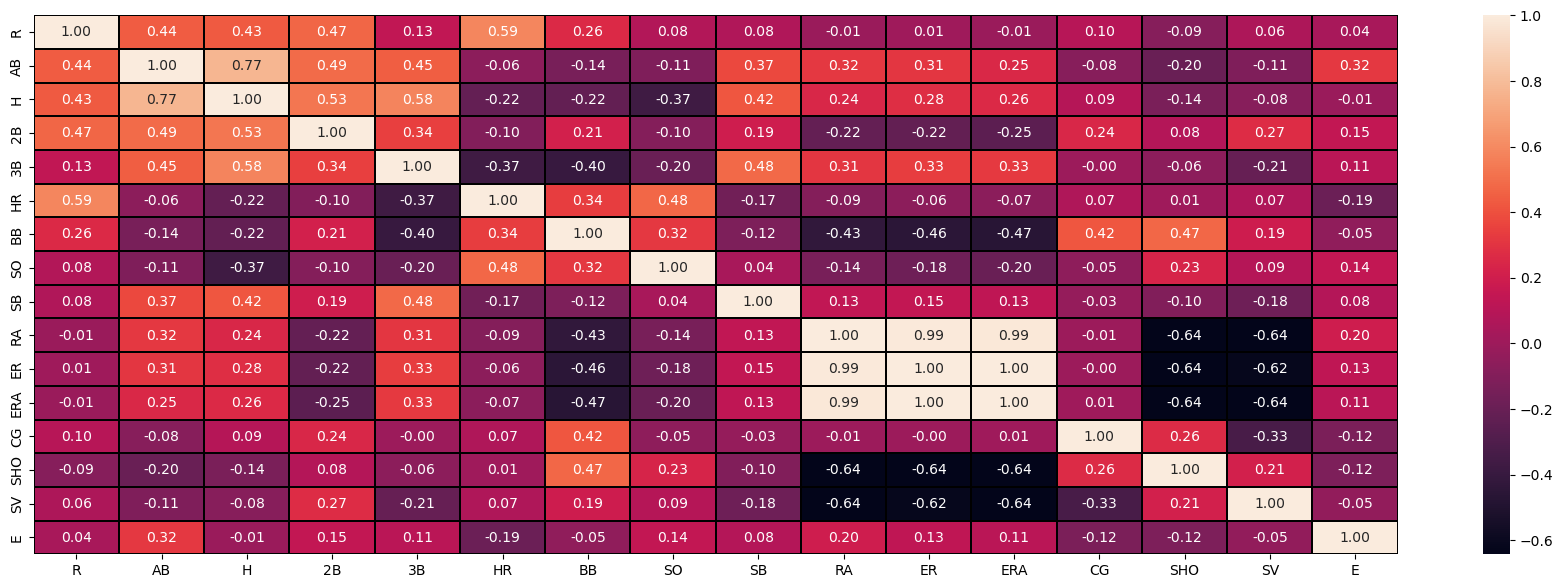

In [82]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(BCS1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

The code defines a function called `correlation` that takes two arguments: `dataset` and `threshold`. The purpose of this function is to find highly correlated columns in the input dataset based on the correlation coefficient and a given threshold.

Here's a step-by-step explanation of the function:

1. `col_corr = set()`: Initializes an empty set to store the names of highly correlated columns.

2. `corr_matrix = dataset.corr()`: Calculates the correlation matrix of the input `dataset`, assuming it is a pandas DataFrame. The `corr()` function computes the pairwise correlation between columns in the DataFrame.

3. The function uses two nested loops to iterate over the elements of the correlation matrix:
   - `for i in range(len(corr_matrix.columns))`: Iterates over the columns of the correlation matrix.
   - `for j in range(i)`: Iterates over the columns before the current column `i` in order to avoid redundant comparisons since the correlation matrix is symmetric.

4. `if abs(corr_matrix.iloc[i, j]) > threshold`: Checks if the absolute value of the correlation coefficient between columns `i` and `j` exceeds the given `threshold`. If it does, the column `corr_matrix.columns[i]` (i.e., the name of the highly correlated column) is added to the `col_corr` set.

5. Finally, the function returns the `col_corr` set, which contains the names of all the columns that have a correlation coefficient greater than the given `threshold` with at least one other column in the input `dataset`.

we can use this function to identify highly correlated columns in our DataFrame and potentially drop some of them to reduce multicollinearity or improve model performance in cases like linear regression or other machine learning tasks where multicollinearity can be an issue.

In [83]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

Using the `correlation` function to find highly correlated features in the DataFrame `BCS1` and then calculating the number of unique correlated features found.

Let's break it down:

1. `corr_features = correlation(BCS1, 0.5)`: This line calls the `correlation` function with the DataFrame `BCS1` as the dataset and `0.5` as the threshold. The function returns a set of column names that are highly correlated with a correlation coefficient greater than `0.5`. These column names are stored in the variable `corr_features`.

2. `len(set(corr_features))`: This line calculates the length of the set `corr_features`, which gives the number of unique column names that are highly correlated with a correlation coefficient greater than `0.5`.

So, the result of `len(set(corr_features))` will give us the count of unique features that have a correlation coefficient greater than `0.5` with at least one other feature in the DataFrame `BCS1`.

In [84]:
corr_features = correlation(BCS1, 0.5)
len(set(corr_features))

8

In [85]:
corr_features

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'SHO', 'SV'}

Calculating the correlation coefficients between the 'R' column and all other columns in the DataFrame `BCS1`, and then sorting the results in ascending order. This will show us how each column in the DataFrame is correlated with the 'R' column.

In [86]:
BCS1.corr()['R'].sort_values()

SHO   -0.085108
RA    -0.013858
ERA   -0.009122
ER     0.007727
E      0.043123
SV     0.061381
SB     0.075323
SO     0.081158
CG     0.101438
3B     0.134204
BB     0.258450
H      0.433525
AB     0.438022
2B     0.469293
HR     0.586894
R      1.000000
Name: R, dtype: float64

The plot a bar chart showing the correlation coefficients of each column in the DataFrame `BCS1` with respect to the 'R' column. The x-axis of the bar chart will contain the column names, and the y-axis will represent the correlation coefficients.

Here's a breakdown of the code:

1. `BCS1.corr()['R']`: This selects the correlation values of the 'R' column from the correlation matrix of `BCS1`. The result is a Series containing the correlation coefficients of each column with the 'R' column.

2. `sort_values()`: This sorts the correlation coefficients in ascending order, so the columns with the lowest correlation with 'R' will appear first.

3. `.plot(kind='bar', grid=True, figsize=(10, 7), title='Correlation with target')`: This plots the bar chart with the following options:
   - `kind='bar'`: This specifies that we want to create a bar chart.
   - `grid=True`: This adds a grid to the plot for better visualization.
   - `figsize=(10, 7)`: This sets the size of the figure to 10 inches in width and 7 inches in height.
   - `title='Correlation with target'`: This sets the title of the plot to 'Correlation with target'.

<Axes: title={'center': 'Correlation with target'}>

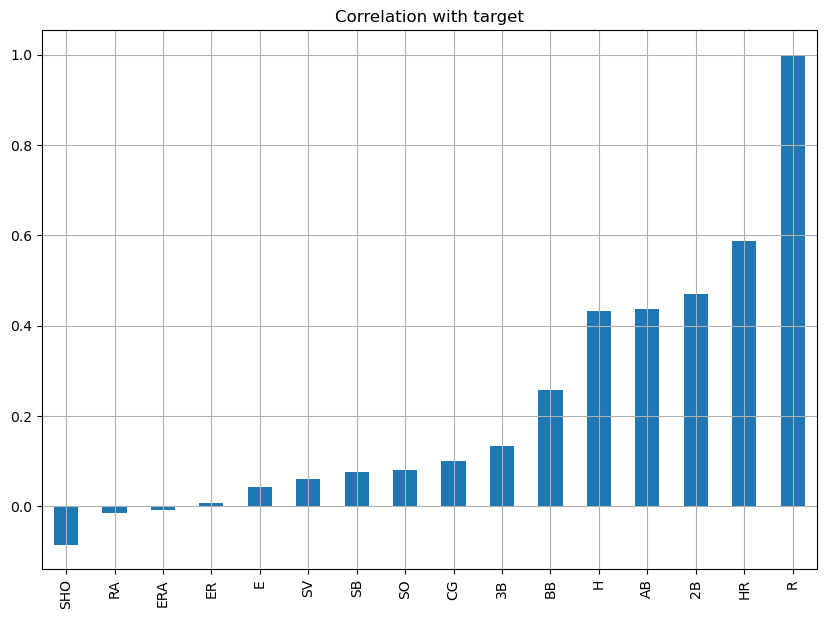

In [87]:
BCS1.corr()['R'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')

# Now Removing multi correlated features & Selecting only final features

We have removed some columns from the DataFrame `BCS1` which are highly correlated with the 'R' column. The removed columns are `'AB'`, `'H'`, `'3B'`, `'SO'`, `'SB'`, `'RA'`, `'ER'`, `'CG'`, and `'E'`. After removing these columns, you are assigning the resulting DataFrame to the variable `f`. Additionally, you are assigning the 'R' column to the variable `l`.

1. `f = BSC1.drop(columns=['R', 'AB', 'H', '3B', 'SO', 'SB', 'RA', 'ER', 'CG', 'E'], axis=1)`: This line drops the specified columns from the DataFrame `BCS1` and creates a new DataFrame `f` without those columns. The `drop` method with the `columns` parameter is used to drop the columns, and `axis=1` indicates that we are dropping columns (0 would indicate dropping rows).

2. `l = BCS1.R`: This line assigns the 'R' column from the original DataFrame `BCS1` to the variable `l`. It seems like you want to use this column as the target variable (dependent variable) for your analysis or modeling.

In [88]:
f = BCS1.drop(columns=['R',  'AB', 'H',  '3B',   'SO', 'SB', 'RA', 'ER',
        'CG',  'E'], axis=1) 
l = BCS1.R 

# StandardScaler 
Using the StandardScaler from the sklearn.preprocessing module to scale the features in the DataFrame f. The StandardScaler standardizes features by removing the mean and scaling to unit variance, which is a common preprocessing step in many machine learning algorithms.

Here's how the code works:

scalar = StandardScaler(): This line creates an instance of the StandardScaler class and assigns it to the variable scalar.

scaled_feature = scalar.fit_transform(f): This line applies the fit_transform method of the StandardScaler to the DataFrame f, which scales the features. The fit_transform method fits the scaler to the data and then transforms it, returning the scaled features in a new array. The resulting array is assigned to the variable scaled_feature.

In [89]:
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f) 

Calculating the Variance Inflation Factor (VIF) for each feature in the scaled DataFrame `scaled_feature`. VIF is used to identify multicollinearity among the features in a dataset. Multicollinearity occurs when two or more features are highly correlated with each other, which can affect the performance and interpretability of certain statistical models.

In [90]:
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
vif

,vif,Features
0,1.168824,2B
1,1.221673,HR
2,1.684810,BB
3,3.221810,ERA
4,2.043052,SHO
5,1.945234,SV


# Split data into train and test

A simple linear regression on the dataset by splitting the data into training and testing sets using the `train_test_split` function. It then iterates over different random states to find the random state that gives the highest accuracy (R-squared score) on the test set.

Here's how the code works:

1. `maxAccu = 0`: This initializes the variable `maxAccu` to store the maximum accuracy achieved during the loop.

2. `lrm = LinearRegression()`: This creates an instance of the `LinearRegression` class from the `sklearn.linear_model` module.

3. `maxRS = 0`: This initializes the variable `maxRS` to store the random state that resulted in the maximum accuracy.

4. The loop iterates over random states from 1 to 199 (200 exclusive) using the `range(1, 200)` function.

5. `x_train, x_test, y_train, y_test = train_test_split(scaled_feature, l, test_size=0.3, random_state=i)`: This line splits the scaled features (`scaled_feature`) and the target variable (`l`) into training and testing sets. The `test_size` parameter specifies that 30% of the data will be used for testing, and the `random_state=i` ensures reproducibility by using different random states for each iteration.

6. `lrm.fit(x_train, y_train)`: This fits the linear regression model to the training data.

7. `pred = lrm.predict(x_test)`: This makes predictions on the test set using the trained linear regression model.

8. `acc = r2_score(y_test, pred)`: This calculates the R-squared score (accuracy) of the predictions on the test set.

9. If the current accuracy (`acc`) is higher than the previous maximum accuracy (`maxAccu`), the `maxAccu` and `maxRS` variables are updated with the new maximum accuracy and the corresponding random state, respectively.

10. After the loop completes, the code prints the best accuracy achieved (`maxAccu`) and the random state that resulted in that accuracy (`maxRS`).

The output will show you the best accuracy achieved on the test set using the linear regression model and the random state that resulted in that accuracy. 

In [91]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.7469205862785206 on random state 29


In [92]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=30)

we want to fit a Linear Regression model (`lrm`) on the training data (`x_train` and `y_train`). The `LinearRegression` class is from the `sklearn.linear_model` module, and it is used for linear regression modeling.

1. `lrm = LinearRegression()`: This creates an instance of the `LinearRegression` class and assigns it to the variable `lrm`. This instance will be used to fit the linear regression model.

2. `lrm.fit(x_train, y_train)`: This fits the linear regression model to the training data. The `fit` method is used to train the model with the features (`x_train`) and the target variable (`y_train`). The linear regression model will learn the coefficients for the features during this step, so it can make predictions on new data.

In [93]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

The lines of code will display the model accuracy scores on the training and testing data using the trained Linear Regression model (`lrm`). The `score` method of the Linear Regression model calculates the coefficient of determination (R-squared) of the prediction, which represents the proportion of the variance in the target variable that is predictable from the features.

1. `lrm.score(x_train, y_train)`: This calculates the R-squared score of the Linear Regression model on the training data (`x_train` and `y_train`). It measures how well the model fits the training data.

2. `lrm.score(x_test, y_test)`: This calculates the R-squared score of the Linear Regression model on the testing data (`x_test` and `y_test`). It measures how well the model generalizes to new, unseen data.

In [94]:
print('Model accuracy score on training data------>',  lrm.score (x_train,y_train))
print('Model accuracy score on testing data------>',lrm.score(x_test,y_test))

Model accuracy score on training data------> 0.7015483213249487
Model accuracy score on testing data------> 0.10519530788688036


The code `y_pred = lrm.predict(x_test)` is using the trained Linear Regression model `lrm` to make predictions on the testing data `x_test`. The `predict` method of the Linear Regression model is used to generate the predicted target values based on the given features.

1. `y_pred = lrm.predict(x_test)`: This line uses the trained Linear Regression model `lrm` to predict the target variable for the testing data `x_test`. The result of the prediction will be stored in the `y_pred` variable, which will be an array containing the predicted values.

After running this line of code, the variable `y_pred` will contain the predicted target values for the testing data, and you can use it to compare the predicted values with the actual target values (`y_test`) to evaluate the performance of the Linear Regression model on the test set.

In [95]:
y_pred = lrm.predict(x_test)
y_pred

array([651.28805109, 648.43605993, 660.45385081, 759.18016821,
       651.81912866, 658.03429474, 710.06508712, 706.15102906,
       691.40370656])

The code is creating a scatter plot to visualize the relationship between the actual target values (`y_test`) and the predicted target values (`y_pred`) from the Linear Regression model. This plot helps we assess how well the model's predictions align with the actual values.

1. `plt.scatter(y_test, y_pred)`: This line creates a scatter plot with `y_test` on the x-axis (actual target values) and `y_pred` on the y-axis (predicted target values). Each point in the plot represents an observation in the testing data, with its actual target value on the x-axis and the corresponding predicted value on the y-axis.

2. `plt.xlabel('Actual Chance of Win')`: This sets the label for the x-axis.

3. `plt.ylabel('Predicted Chance of Win')`: This sets the label for the y-axis.

4. `plt.title('Actual vs Model Predicted')`: This sets the title of the plot.

5. `plt.show()`: This displays the scatter plot.

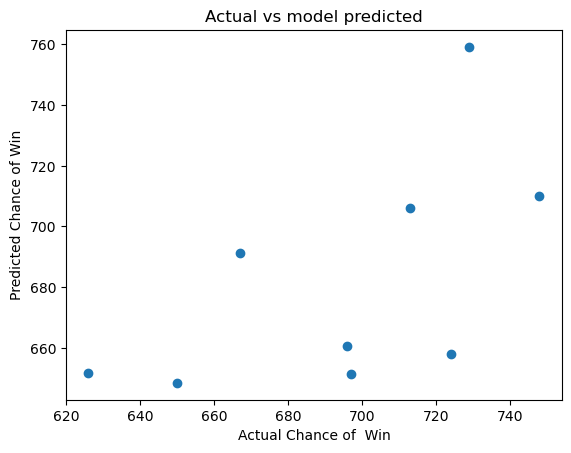

In [96]:
plt.scatter (y_test,y_pred)
plt.xlabel('Actual Chance of  Win')
plt.ylabel('Predicted Chance of Win')
plt.title('Actual vs model predicted')
plt.show()

# Model evalution matrics for LinearRegression

To evaluate the performance of the Linear Regression model, you can use various metrics such as residuals, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and R-squared (also called coefficient of determination). Adjusted R-squared is not directly available in `scikit-learn`, but you can manually calculate it using the formula.

 `y_test` contains the actual target values, and `y_pred` contains the predicted target values obtained from the Linear Regression model.

1. Residuals: These are the differences between the actual target values and the predicted target values.

2. Mean Absolute Error (MAE): It measures the average absolute difference between the actual and predicted values.

3. Mean Squared Error (MSE): It measures the average squared difference between the actual and predicted values.

4. Root Mean Squared Error (RMSE): It is the square root of the MSE and provides a more interpretable error metric in the same units as the target variable.

5. R-squared: It quantifies the proportion of the variance in the target variable explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit.

6. Adjusted R-squared: It adjusts R-squared for the number of features used in the model and is a more appropriate metric when comparing models with different numbers of features.

In [97]:
# Residuals
# Mean absolute error
# Mean Square error
# Root Mean Square Error
# R-squared /Adjusted R squared
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [98]:
y_pred = lrm.predict(x_test)

In [99]:
print ('mean_absolute_error is --->',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error is --->',mean_squared_error(y_test,y_pred))
print ('mean_squared_error is --->',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error is ---> 30.441625631111492
mean_squared_error is ---> 1262.889782745331
mean_squared_error is ---> 35.537160589238574


In [100]:
# Lasso( Least Absolute Shrinkage and Selection Operator) / L1 form
# Ridge(L2 form)

from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [101]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

# Assuming x_train and y_train are your training data
# and x_test and y_test are your test data.

# Create and fit the LassoCV model without the 'normalize' parameter.
lasscv = LassoCV(alphas=None, max_iter=100)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100)

In [102]:
alpha= lasscv.alpha_
alpha

11.587600405599991

In [103]:
lasso_reg = Lasso (alpha)
lasso_reg. fit (x_train, y_train)

Lasso(alpha=11.587600405599991)

In [104]:
lasso_reg.score(x_test,y_test)

0.22895058426480408

# Now Using Ridge regression model

Implements Ridge regression using the `RidgeCV` class from `scikit-learn`. Ridge regression is a regularization technique that adds a penalty term to the linear regression objective function to prevent overfitting and reduce multicollinearity.

1. `from sklearn.linear_model import RidgeCV`: This imports the `RidgeCV` class, which performs Ridge regression with cross-validated alpha selection.

2. `from sklearn.preprocessing import StandardScaler`: This imports the `StandardScaler` class from `scikit-learn`, which will be used to standardize the training data.

3. `scaler = StandardScaler()`: This creates an instance of the `StandardScaler` class and assigns it to the variable `scaler`. The `StandardScaler` will be used to scale the training data to have zero mean and unit variance.

4. `x_train_scaled = scaler.fit_transform(x_train)`: This standardizes the training data `x_train` using the `fit_transform` method of the `StandardScaler`. It computes the mean and standard deviation of the training data and scales it accordingly.

5. `ridgecv = RidgeCV(alphas=np.arange(0.001, 0.1, 0.01))`: This creates an instance of the `RidgeCV` class with a range of alpha values specified by `alphas=np.arange(0.001, 0.1, 0.01)`. The `RidgeCV` class performs Ridge regression with cross-validated alpha selection, so it will automatically select the best alpha based on cross-validation.

6. `ridgecv.fit(x_train_scaled, y_train)`: This fits the Ridge regression model to the scaled training data (`x_train_scaled`) and the target variable (`y_train`). The `fit` method will automatically search for the best alpha using cross-validation.

In [105]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Assuming x_train and y_train are your training data
# and x_test and y_test are your test data.

# Create a StandardScaler and fit_transform the training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Create and fit the RidgeCV model with the specified alphas
ridgecv = RidgeCV(alphas=np.arange(0.001, 0.1, 0.01))
ridgecv.fit(x_train_scaled, y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [106]:
# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Make predictions on the test data
y_pred_ridge = ridgecv.predict(x_test_scaled)


In [107]:
ridgecv.alpha_

0.09099999999999998

In [108]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [109]:
ridge_model.score(x_test, y_test)

0.1082855737674695

# Now we can save the model and later we can use it for prediction

The `pickle` module in Python to save the trained Linear Regression model (`lrm`) to a file. This allows us to persist the model and use it later for making predictions on new data without retraining the model every time.

1. `import pickle`: This imports the `pickle` module, which provides functionality for serializing and deserializing Python objects.

2. `pickle.dump(lrm, open('lrm_model', 'wb'))`: This line uses `pickle.dump()` to save the trained Linear Regression model (`lrm`) to a file named `'lrm_model'`. The `'wb'` mode stands for write binary mode, indicating that the file will be opened for writing in binary format.

In [110]:
import pickle

In [111]:
pickle.dump (lrm, open('lrm_model', 'wb'))